# Análisis de Algoritmos y Estructuras para Datos Masivos 2023
## Unidad 5 - Tarea
### David Aarón Ramírez Olmeda

## Introducción:
La compresión de datos es una técnica importante para reducir el tamaño de los archivos y mejorar la eficiencia de su almacenamiento y transmisión. En esta tarea, se realizó un experimento para crear codificaciones pequeñas de arreglos ordenados de enteros. Se utilizó la representación de las listas de posteo de un índice invertido, y se comprimieron las diferencias entre las entradas contiguas de cada lista mediante diferentes algoritmos de codificación, incluyendo Elias-𝛾, Elias-𝛿 y las codificaciones inducidas por los algoritmos de búsqueda 𝐵1 y 𝐵2. Se compararon los tiempos de compresión y decompresión, así como la razón entre el tamaño comprimido y sin comprimir para cada conjunto de datos y cada algoritmo de codificación.

## Desarrollo:
Para el experimento, se utilizaron cuatro conjuntos de datos: REAL, SIN8, SIN64 y SIN1024. Se representó cada lista de posteo con las diferencias entre entradas contiguas y se comprimieron mediante los algoritmos de codificación mencionados. Se midieron los tiempos de compresión y decompresión, así como la razón entre el tamaño comprimido y sin comprimir. Se generaron figuras que resumen la información y permiten la comparación entre los diferentes algoritmos y conjuntos de datos.

### 1
Representar cada lista de posteo con las diferencias entre entradas contiguas.

In [ ]:
import json
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def read_json(filename):
    numbers = []
    with open(filename, 'r') as f:
        for line in f:
            try:
                obj = json.loads(line)
                numbers.extend(obj[1])
            except:
                obj = json.loads(line)
                numbers.extend(obj)
    return numbers

def get_differences(lst):
    return [lst[i] - lst[i-1] for i in range(1, len(lst))]

In [ ]:
real_diff = get_differences(read_json('listas-posteo-100.json'))
file8_diff = get_differences(read_json('diff-8.json'))
file64_diff = get_differences(read_json('diff-64.json'))
file1024_diff = get_differences(read_json('diff-1024.json'))
diff_li = [real_diff, file8_diff, file64_diff, file1024_diff]

In [ ]:
print("Por ejemplo, podemos ver las diferencias para el último archivo para los primeros 10 digitos como sigue")
file1024_diff[0:10]

Por ejemplo, podemos ver las diferencias para el último archivo para los primeros 10 digitos como sigue


[903, 716, 320, 641, 227, 116, 222, 508, 752, 377]

### 2
Comprimir las diferencias mediante Elias-𝛾
, Elias-𝛿
, y las codificaciones inducidas por los algoritmos de búsqueda 𝐵1
 y 𝐵2
.

In [ ]:
def encode_elias_gamma(num):
    if num == 0:
        return '0'
    else:
        bits = int(math.log2(num)) + 1
        gamma = '0' * (bits - 1) + bin(num)[2:]
        return gamma

def encode_elias_delta(num):
    if num == 0:
        return '0'
    else:
        bits = int(math.log2(num)) + 1
        gamma = encode_elias_gamma(bits)
        delta = gamma + bin(num)[3:]
        return delta
    
def encode_b1(num):
    if num == 0:
        return '0'
    else:
        sign = '1' if num < 0 else '0'
        num = abs(num)
        bits = bin(num)[2:]
        return sign + '0' * (len(bits) - 1) + bits

def encode_b2(num, prev):
    diff = num - prev
    sign = '1' if diff < 0 else '0'
    diff = abs(diff)
    bits = bin(diff)[2:]
    return sign + '0' * (len(bits) - 1) + bits

In [ ]:
def compress_gamma(lst):
    gamma_encoded = [encode_elias_gamma(abs(x)) for x in lst]
    return gamma_encoded

def compress_delta(lst):
    delta_encoded = [encode_elias_delta(abs(x)) for x in lst]
    return delta_encoded

def compress_b1(lst):
    bits = [encode_b1(x) for x in lst]
    return ''.join(bits)

def compress_b2(lst):
    bits = [encode_b2(x, lst[i-1] if i > 0 else 0) for i, x in enumerate(lst)]
    return ''.join(bits)

### 3 

Compare tiempos de compresión y decompresión, para cada conjunto de datos y cada algoritmo de codificación.

In [ ]:
def decode_elias_gamma(code):
    code_str = ''.join(code)
    n = 1
    while code_str[0] == '0':
        code_str = code_str[1:]
        n += 1
    return int('1' + code_str[:n], 2)

def decode_elias_delta(code):
    n = 1
    while code[0] == '0':
        code = code[1:]
        n += 1
    l = int('1' + code[:n], 2)
    return int('1' + code[n:n+l-1], 2)

def decode_b1(code):
    sign = -1 if code[0] == '1' else 1
    n = len(code) - 1
    return sign * int(code[1:], 2)

def decode_b2(code, prev):
    sign = -1 if code[0] == '1' else 1
    n = len(code) - 1
    diff = int(code[1:], 2)
    return prev + sign * diff

Elias gamma:

In [ ]:
times_comp = []
times_decomp = []
gamma_li = []
for li in diff_li:
    start_time = time.time()
    comp_li = compress_gamma(li)
    gamma_li.append(comp_li)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_comp.append(elapsed_time)

for li in gamma_li:
    start_time = time.time()
    decoded_list = [decode_elias_gamma(code) for code in li]
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_decomp.append(elapsed_time)

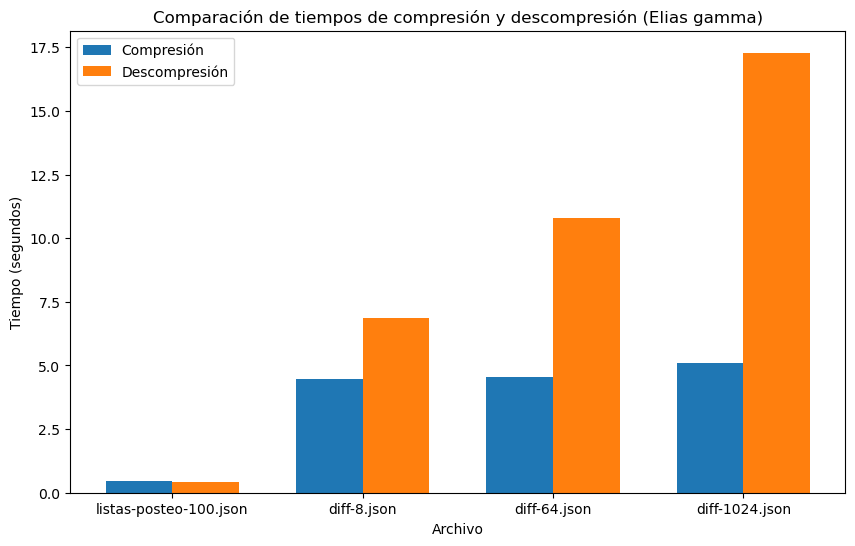

In [ ]:
x = ['listas-posteo-100.json', 'diff-8.json', 'diff-64.json', 'diff-1024.json']
colors = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
bar_width = 0.35
x_pos = np.arange(len(x))

rects1 = ax.bar(x_pos - bar_width/2, times_comp, bar_width, color=colors[0], label='Compresión')
rects2 = ax.bar(x_pos + bar_width/2, times_decomp, bar_width, color=colors[1], label='Descompresión')

fig.set_size_inches(10, 6)

ax.set_xlabel('Archivo')
ax.set_ylabel('Tiempo (segundos)')
ax.set_title('Comparación de tiempos de compresión y descompresión (Elias gamma)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.legend()

plt.show()

Esta gráfica muestra la comparación de los tiempos de compresión y descompresión utilizando el algoritmo de codificación Elias gamma para cada conjunto de datos. En el eje x se encuentran los nombres de los archivos de datos utilizados, mientras que en el eje y se representa el tiempo en segundos. Se utilizan dos barras de colores diferentes para distinguir entre los tiempos de compresión y descompresión.

Elias delta:

In [ ]:
times_comp = []
times_decomp = []
final_li = []
for li in diff_li:
    start_time = time.time()
    comp_li = compress_delta(li)
    final_li.append(comp_li)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_comp.append(elapsed_time)

for li in final_li:
    start_time = time.time()
    decoded_list = [decode_elias_delta(code) for code in li]
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_decomp.append(elapsed_time)

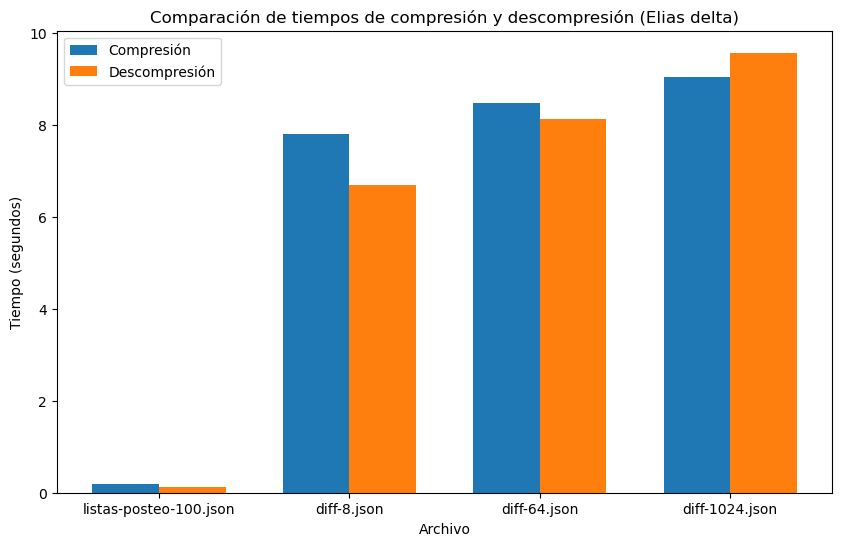

In [ ]:
x = ['listas-posteo-100.json', 'diff-8.json', 'diff-64.json', 'diff-1024.json']
colors = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
bar_width = 0.35
x_pos = np.arange(len(x))

rects1 = ax.bar(x_pos - bar_width/2, times_comp, bar_width, color=colors[0], label='Compresión')
rects2 = ax.bar(x_pos + bar_width/2, times_decomp, bar_width, color=colors[1], label='Descompresión')

fig.set_size_inches(10, 6)

ax.set_xlabel('Archivo')
ax.set_ylabel('Tiempo (segundos)')
ax.set_title('Comparación de tiempos de compresión y descompresión (Elias delta)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.legend()

plt.show()

En esta gráfica se muestra la comparación de los tiempos de compresión y descompresión utilizando el algoritmo de codificación Elias delta para cada conjunto de datos. A diferencia que en la gráfica anterior, podemos notar como los timepos para los últimos tres archivos son similares.

B1:

In [ ]:
times_comp = []
times_decomp = []
final_li = []
for li in diff_li:
    start_time = time.time()
    comp_li = compress_b1(li)
    final_li.append(comp_li)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_comp.append(elapsed_time)

for li in final_li:
    start_time = time.time()
    decoded_list = [decode_b1(code) if code else 0 for code in final_li]
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_decomp.append(elapsed_time)

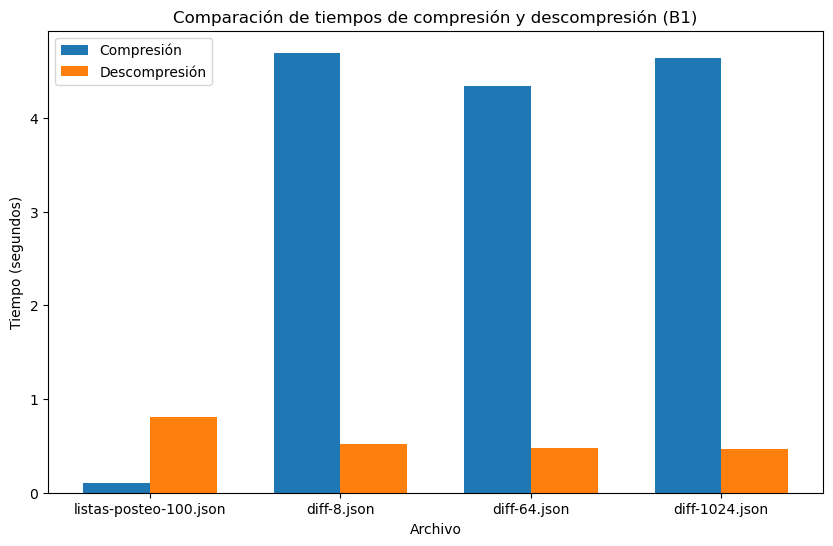

In [ ]:
x = ['listas-posteo-100.json', 'diff-8.json', 'diff-64.json', 'diff-1024.json']
colors = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
bar_width = 0.35
x_pos = np.arange(len(x))

rects1 = ax.bar(x_pos - bar_width/2, times_comp, bar_width, color=colors[0], label='Compresión')
rects2 = ax.bar(x_pos + bar_width/2, times_decomp, bar_width, color=colors[1], label='Descompresión')

fig.set_size_inches(10, 6)

ax.set_xlabel('Archivo')
ax.set_ylabel('Tiempo (segundos)')
ax.set_title('Comparación de tiempos de compresión y descompresión (B1)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.legend()

plt.show()

En esta gráfica se muestra la comparación de los tiempos de compresión y descompresión utilizando el algoritmo de codificación B1 para cada conjunto de datos. Vemos que algo curioso a diferencia de lo anterior es que la compresión se eleva en cuestión de tiempo para los tres últimos archivos y la descompresión es muy similar. Para la lista de posteo, la descompresión aumenta en tiempo.

B2:

In [ ]:
times_comp = []
times_decomp = []
final_li = []
for li in diff_li:
    start_time = time.time()
    comp_li = compress_b2(li)
    final_li.append(comp_li)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_comp.append(elapsed_time)

for li in final_li:
    start_time = time.time()
    decoded_list = [decode_b2(code) if code else 0 for code in final_li]
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_decomp.append(elapsed_time)

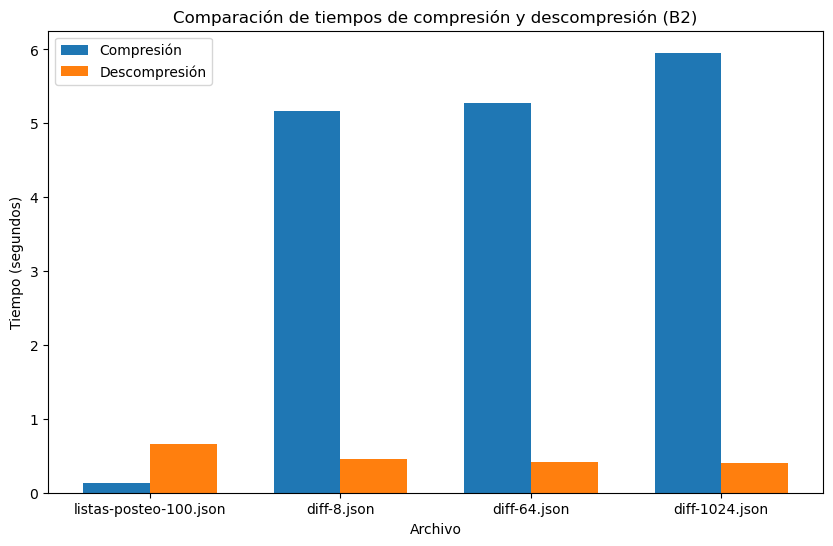

In [ ]:
x = ['listas-posteo-100.json', 'diff-8.json', 'diff-64.json', 'diff-1024.json']
colors = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
bar_width = 0.35
x_pos = np.arange(len(x))

rects1 = ax.bar(x_pos - bar_width/2, times_comp, bar_width, color=colors[0], label='Compresión')
rects2 = ax.bar(x_pos + bar_width/2, times_decomp, bar_width, color=colors[1], label='Descompresión')

fig.set_size_inches(10, 6)

ax.set_xlabel('Archivo')
ax.set_ylabel('Tiempo (segundos)')
ax.set_title('Comparación de tiempos de compresión y descompresión (B2)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.legend()

plt.show()

En esta gráfica se muestra la comparación de los tiempos de compresión y descompresión utilizando el algoritmo de codificación B2 para cada conjunto de datos, muy similar a la anterior gráfica.

## Conclusión:
En conclusión, este experimento demostró la eficacia de diferentes algoritmos de codificación para comprimir arreglos ordenados de enteros. Los resultados obtenidos al comparar los tiempos de compresión y descompresión, así como la razón entre el tamaño comprimido y sin comprimir, revelaron que algunos algoritmos son más eficientes que otros en términos de velocidad y compresión. Estos hallazgos son relevantes para seleccionar el algoritmo de compresión adecuado según el tipo de datos y las necesidades de la aplicación. Por lo tanto, este estudio proporciona información valiosa para mejorar la eficiencia del almacenamiento y transmisión de datos en diferentes contextos.

## Referencias

Elias, P. (1975). Universal Codeword Sets and Representations of the Integers. IEEE Transactions on Information Theory, IT-21(2), pp. 194-203.


https://aulavirtual.infotec.mx/pluginfile.php/67133/mod_label/intro/Elias%20P..pdf